# Submissions
- 전부 라벨인코딩 돌려서 제출 : 86359
- age를 구간으로 나눠서 처리 : 0.85275
- education, workclass, capital 처리: 0.86495
- +age를 처리해봤더니: 0.86043
- age를 드랍했더니: 0.86314


## 다음 시도
- age와 work를 섞는 방법

In [165]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import os

In [166]:
os.getcwd()

'c:\\kaggle\\KaKr_4th'

In [167]:
path = './data'
f_list = os.listdir(path)
print(f_list)

['sample_submission.csv', 'test.csv', 'train.csv']


In [168]:
train = pd.read_csv(os.path.join(path,f_list[2]))
test = pd.read_csv(os.path.join(path,f_list[1]))
sample = pd.read_csv(os.path.join(path,f_list[0]))

In [169]:
orig_train = train.copy()
orig_test = test.copy()

In [170]:
display(train.head())
display(test.head())

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K


,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0,28,Private,67661,Some-college,10,Never-married,Adm-clerical,Other-relative,White,Female,0,0,40,United-States
1,1,40,Self-emp-inc,37869,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
2,2,20,Private,109952,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,25,United-States
3,3,40,Private,114537,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
4,4,37,Private,51264,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,France


In [171]:
train.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [172]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.2+ MB


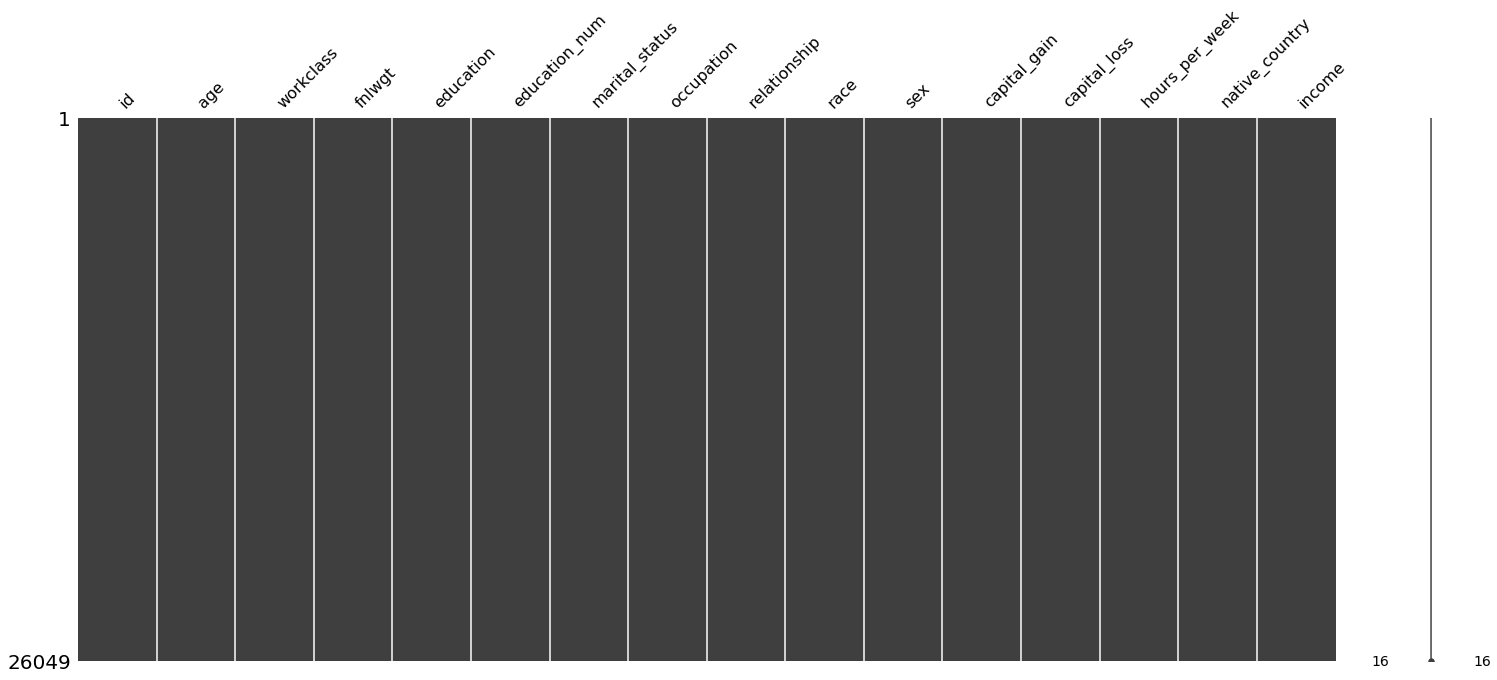

In [173]:
msno.matrix(train)

In [174]:
type(train['income'][1])

str

In [175]:
train.loc[train['income']=='>50K', 'income'] = 1
train.loc[train['income']=='<=50K', 'income'] = 0

In [176]:
train.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,1
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,0
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,0
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,0
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,0


In [177]:
train.describe()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,26049.000000,26049.000000,2.604900e+04,26049.000000,26049.00000,26049.000000,26049.000000
mean,13024.000000,38.569235,1.903045e+05,10.088372,1087.68970,87.732734,40.443126
std,7519.842917,13.671489,1.059663e+05,2.567610,7388.85469,403.230205,12.361850
min,0.000000,17.000000,1.376900e+04,1.000000,0.00000,0.000000,1.000000
25%,6512.000000,28.000000,1.181080e+05,9.000000,0.00000,0.000000,40.000000
50%,13024.000000,37.000000,1.788660e+05,10.000000,0.00000,0.000000,40.000000
75%,19536.000000,48.000000,2.377350e+05,12.000000,0.00000,0.000000,45.000000
max,26048.000000,90.000000,1.484705e+06,16.000000,99999.00000,4356.000000,99.000000


# 0. ID
- 드랍하면 혹시 모르니가 일단 pop

In [178]:
train_id = train.pop('id')
test_id = test.pop('id')

# 1. Age
### 나이를 구간별로 나눠서 생각해보자구
1. ~33
2. 34~47
3. 48~55
4. 56~62
5. 63~

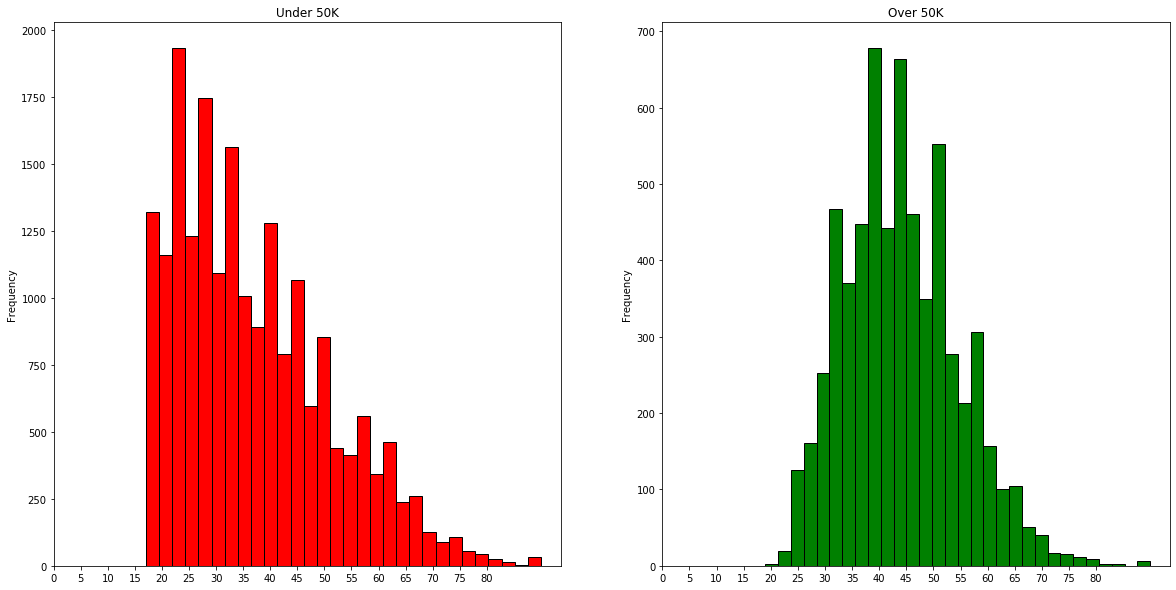

In [179]:
f,ax = plt.subplots(1,2,figsize=(20,10))
train[train['income']==0].age.plot.hist(ax=ax[0],bins=30,edgecolor='black',color='red')
ax[0].set_title('Under 50K')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train[train['income']==1].age.plot.hist(ax=ax[1],color='green', bins=30, edgecolor='black')
ax[1].set_title('Over 50K')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

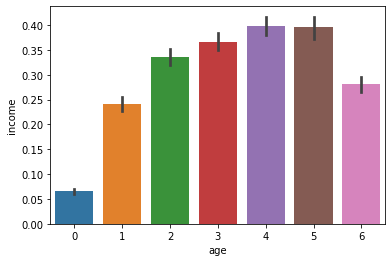

In [180]:
# cut 명령을 사용하면 실수값을 다음처럼 카테고리 값으로 바꿀 수 있다. 
bins=[-np.inf,30,35,40,45,50,55,np.inf]
labels=[0,1,2,3,4,5,6]
train["age"] = pd.cut(train['age'],bins,labels=labels)
test["age"] = pd.cut(test['age'],bins,labels=labels)

sns.barplot(x='age',y='income',data=train)
plt.show

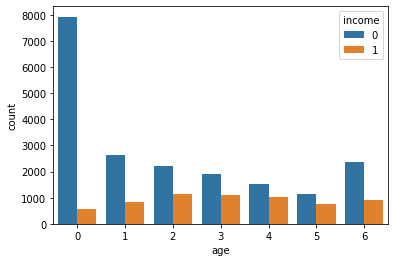

In [181]:
sns.countplot('age',data=train,hue='income')

In [15]:
train.loc[train['age']<=33,'age'] = 1
train.loc[(train['age']>=34)&(train['age']<=47),'age'] = 2
train.loc[(train['age']>=48)&(train['age']<=55),'age'] = 3
train.loc[(train['age']>=56)&(train['age']<=62),'age'] = 4
train.loc[train['age']>=63,'age'] = 5

In [16]:
train['age'].value_counts()

0    8494
1    3483
2    3353
6    3274
3    3021
4    2546
5    1878
Name: age, dtype: int64

In [58]:
train.describe()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,26049.000000,26049.000000,2.604900e+04,26049.000000,26049.00000,26049.000000,26049.000000
mean,13024.000000,38.569235,1.903045e+05,10.088372,1087.68970,87.732734,40.443126
std,7519.842917,13.671489,1.059663e+05,2.567610,7388.85469,403.230205,12.361850
min,0.000000,17.000000,1.376900e+04,1.000000,0.00000,0.000000,1.000000
25%,6512.000000,28.000000,1.181080e+05,9.000000,0.00000,0.000000,40.000000
50%,13024.000000,37.000000,1.788660e+05,10.000000,0.00000,0.000000,40.000000
75%,19536.000000,48.000000,2.377350e+05,12.000000,0.00000,0.000000,45.000000
max,26048.000000,90.000000,1.484705e+06,16.000000,99999.00000,4356.000000,99.000000


In [59]:
train.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

# Work class
- 0,1의 비율을 따져서 절반 이하, 절반, 반대 총 3개의 클래스로 나눔

In [182]:
train['workclass'].value_counts()

Private             18123
Self-emp-not-inc     2030
Local-gov            1692
?                    1502
State-gov            1043
Self-emp-inc          877
Federal-gov           765
Without-pay            11
Never-worked            6
Name: workclass, dtype: int64

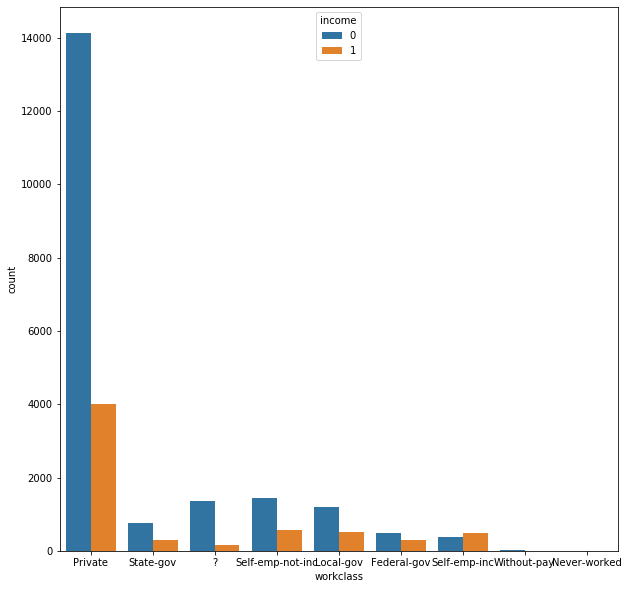

In [183]:
plt.subplots(figsize=(10,10))
sns.countplot('workclass',data=train, hue='income')

In [184]:
half = ['Without-pay','Federal-gov','Never-worked','Local-gov']
less = ['Private','State-gov','?','Self-emp-not-inc']

for i in less:
    train.loc[train['workclass']==i,'workclass'] = 0
    
for i in half:
    train.loc[train['workclass']==i,'workclass'] = 1
train.loc[train['workclass']=='Self-emp-inc','workclass'] = 2

In [185]:
train['workclass'].value_counts()

0    22698
1     2474
2      877
Name: workclass, dtype: int64

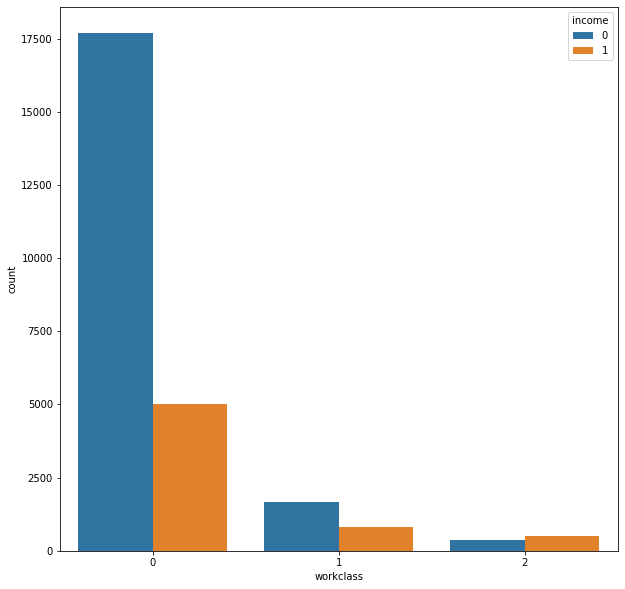

In [186]:
plt.subplots(figsize=(10,10))
sns.countplot('workclass',data=train, hue='income')

In [187]:
for i in less:
    test.loc[test['workclass']==i,'workclass'] = 0
    
for i in half:
    test.loc[test['workclass']==i,'workclass'] = 1
test.loc[test['workclass']=='Self-emp-inc','workclass'] = 2

In [188]:
test['workclass'].value_counts()

0    5673
1     600
2     239
Name: workclass, dtype: int64

# fnlwgt
- 대상이 전체를 얼마나 대표하고 있는지에 대한 가중치

In [90]:
train['fnlwgt'].value_counts().unique()

array([11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1], dtype=int64)

# Education
- HS-grad         8433
- Some-college    5800
- Bachelors       4344
- Masters         1378
- Assoc-voc       1096
- 11th             922
- Assoc-acdm       842
- 10th             731
- 7th-8th          505
- Prof-school      466
- 9th              418
- 12th             359
- Doctorate        316
- 5th-6th          265
- 1st-4th          134
- Preschool         40

In [189]:
train['education'].value_counts()

HS-grad         8433
Some-college    5800
Bachelors       4344
Masters         1378
Assoc-voc       1096
11th             922
Assoc-acdm       842
10th             731
7th-8th          505
Prof-school      466
9th              418
12th             359
Doctorate        316
5th-6th          265
1st-4th          134
Preschool         40
Name: education, dtype: int64

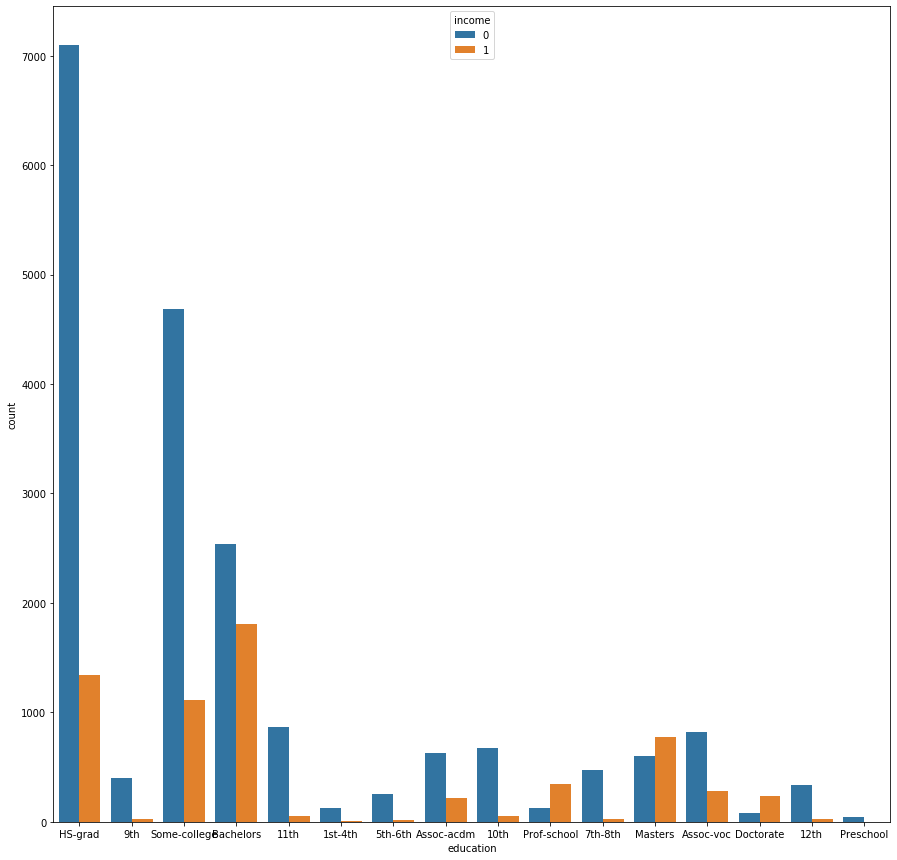

In [190]:
plt.subplots(figsize=(15,15))
sns.countplot('education',data=train, hue='income')

In [191]:
a = set(train['education'].values)

In [192]:
train['education'].value_counts()

HS-grad         8433
Some-college    5800
Bachelors       4344
Masters         1378
Assoc-voc       1096
11th             922
Assoc-acdm       842
10th             731
7th-8th          505
Prof-school      466
9th              418
12th             359
Doctorate        316
5th-6th          265
1st-4th          134
Preschool         40
Name: education, dtype: int64

In [193]:
edu_list = set(train['education'].values)
lst = []
for i in edu_list:
    print('###########',i,'############')
    # 이상 무
    total = sum(train['education']==i)
    num_1 = sum((train['education']==i) & (train['income']==1))
    ratio = num_1/total
    j = []
    j.append(i)
    j.append(ratio)
    lst.append(j)
    print(ratio)

########### 7th-8th ############
0.05742574257425743
########### 12th ############
0.07242339832869081
########### 9th ############
0.05263157894736842
########### 11th ############
0.0596529284164859
########### 1st-4th ############
0.03731343283582089
########### Doctorate ############
0.7341772151898734
########### Bachelors ############
0.4155156537753223
########### Prof-school ############
0.7339055793991416
########### HS-grad ############
0.15854381596110517
########### Some-college ############
0.19258620689655173
########### 5th-6th ############
0.04905660377358491
########### Preschool ############
0.0
########### 10th ############
0.07250341997264022
########### Assoc-voc ############
0.25547445255474455
########### Masters ############
0.5616835994194485
########### Assoc-acdm ############
0.25534441805225655


In [194]:
lst

[['7th-8th', 0.05742574257425743],
 ['12th', 0.07242339832869081],
 ['9th', 0.05263157894736842],
 ['11th', 0.0596529284164859],
 ['1st-4th', 0.03731343283582089],
 ['Doctorate', 0.7341772151898734],
 ['Bachelors', 0.4155156537753223],
 ['Prof-school', 0.7339055793991416],
 ['HS-grad', 0.15854381596110517],
 ['Some-college', 0.19258620689655173],
 ['5th-6th', 0.04905660377358491],
 ['Preschool', 0.0],
 ['10th', 0.07250341997264022],
 ['Assoc-voc', 0.25547445255474455],
 ['Masters', 0.5616835994194485],
 ['Assoc-acdm', 0.25534441805225655]]

In [195]:
over_7 = []
from_5 = []
from_4 = []
rest = []
for i in range(len(lst)):
    if lst[i][1] >=0.7:
        over_7.append(lst[i][0])
    elif lst[i][1] >=0.5 and lst[i][1]<0.7:
        from_5.append(lst[i][0])
    elif lst[i][1] >=0.3 and lst[i][1]<0.5:
        from_4.append(lst[i][0])
    else:
        rest.append(lst[i][0])

In [196]:
print(over_7)
print(from_5)
print(from_4)
print(rest)

['Doctorate', 'Prof-school']
['Masters']
['Bachelors']
['7th-8th', '12th', '9th', '11th', '1st-4th', 'HS-grad', 'Some-college', '5th-6th', 'Preschool', '10th', 'Assoc-voc', 'Assoc-acdm']


In [197]:
def encode(data, target, a,b):
    data.loc[data[target]==a,target] = b

In [198]:
for i in over_7:
    encode(train,'education',i,3)
    encode(test,'education',i,3)

for i in from_5:
    encode(train,'education',i,2)
    encode(test,'education',i,2)
    
for i in from_4:
    encode(train,'education',i,1)
    encode(test,'education',i,1)
    
for i in rest:
    encode(train,'education',i,0)
    encode(test,'education',i,0)

In [199]:
set(train['education'].values)

{0, 1, 2, 3}

In [200]:
train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,2,0,168538,0,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,1
1,0,0,101626,0,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,0
2,0,0,353358,0,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,0
3,0,0,151158,0,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,0
4,0,0,122234,0,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,0


# education_num
- education_num은 education과 같은 의미라고 하므로 그냥 drop
- 출처: https://www.kaggle.com/c/kakr-4th-competition/discussion/193743

In [201]:
train = train.drop('education_num',axis=1)
test =test.drop('education_num',axis=1)

In [202]:
display(train.head())
display(test.head())

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,2,0,168538,0,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,1
1,0,0,101626,0,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,0
2,0,0,353358,0,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,0
3,0,0,151158,0,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,0
4,0,0,122234,0,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,0


,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0,0,67661,0,Never-married,Adm-clerical,Other-relative,White,Female,0,0,40,United-States
1,2,2,37869,0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
2,0,0,109952,0,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,25,United-States
3,2,0,114537,0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
4,2,0,51264,3,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,France


# martial_status

In [203]:
train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

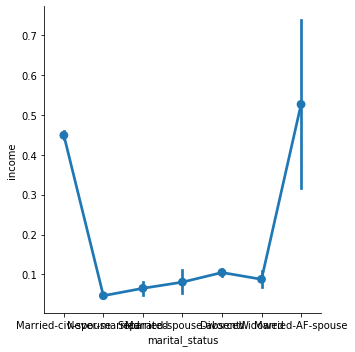

In [204]:
sns.factorplot('marital_status', 'income',data=train)

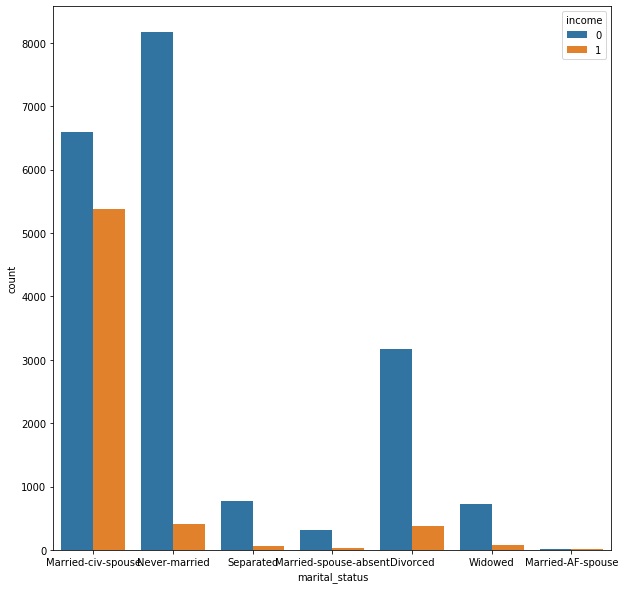

In [205]:
plt.subplots(figsize=(10,10))
sns.countplot('marital_status', hue='income',data=train)

In [206]:
set(train['marital_status'].values)

{'Divorced',
 'Married-AF-spouse',
 'Married-civ-spouse',
 'Married-spouse-absent',
 'Never-married',
 'Separated',
 'Widowed'}

In [207]:
edu_list = set(train['marital_status'].values)
lst = []
for i in edu_list:
    print('###########',i,'############')
    # 이상 무
    total = sum(train['marital_status']==i)
    num_1 = sum((train['marital_status']==i) & (train['income']==1))
    ratio = num_1/total
    j = []
    j.append(i)
    j.append(ratio)
    lst.append(j)
    print(ratio)

########### Married-civ-spouse ############
0.44878863826232246
########### Widowed ############
0.08793969849246232
########### Never-married ############
0.04680205415499533
########### Married-AF-spouse ############
0.5263157894736842
########### Divorced ############
0.10492081447963801
########### Separated ############
0.06537530266343826
########### Married-spouse-absent ############
0.08083832335329341


In [208]:
about_1 = ['Married-spouse-absent','Separated','Divorced','Never-married','Widowed']
for i in about_1:
    train.loc[train['marital_status']==i,'marital_status']= 0
    test.loc[test['marital_status']==i,'marital_status']= 0
    
train.loc[train['marital_status']=='Married-civ-spouse','marital_status']= 1
test.loc[test['marital_status']=='Married-civ-spouse','marital_status']= 1

train.loc[train['marital_status']=='Married-AF-spouse','marital_status']= 2
test.loc[test['marital_status']=='Married-AF-spouse','marital_status']= 2

In [209]:
set(train['marital_status'].values)

{0, 1, 2}

# Capital gain & loss
- 귀찮은데 그냥 합치자

In [210]:
train['capital'] = train['capital_gain']+train['capital_loss']
test['capital'] = test['capital_gain']+test['capital_loss']

In [211]:
train = train.drop('capital_gain',axis=1)
test = test.drop('capital_gain',axis=1)

train = train.drop('capital_loss',axis=1)
test = test.drop('capital_loss',axis=1)

In [212]:
from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# # 데이터에서 특징 찾기(범주의 수
# le.fit(edu)

# #데이터 변환
# train['education'] = le.transform(train['education'])

In [213]:
def to_cat(label,data):
    le = LabelEncoder()
    val = list(data[label].values)
    le.fit(val)
    data[label] = le.transform(data[label])

In [214]:
for i in [train, test]:
    for j in ['marital_status', 'native_country', 'occupation', 'race', 'relationship', 'sex']:
        to_cat(j,i)

In [215]:
train.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income,capital
0,2,0,168538,0,1,12,0,4,1,60,38,1,0
1,0,0,101626,0,0,7,3,4,1,20,38,0,0
2,0,0,353358,0,0,8,3,4,1,16,38,0,0
3,0,0,151158,0,0,10,3,4,0,25,38,0,0
4,0,0,122234,0,0,1,1,2,0,20,0,0,0


In [216]:
test.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,capital
0,0,0,67661,0,0,1,2,4,0,40,39,0
1,2,2,37869,0,1,4,0,4,1,50,39,0
2,0,0,109952,0,0,6,3,4,1,25,39,0
3,2,0,114537,0,1,4,0,4,1,50,39,0
4,2,0,51264,3,1,10,0,4,1,99,10,0


In [217]:
print(set(train['workclass'].values))
print(set(train['education'].values))

{0, 1, 2}
{0, 1, 2, 3}


In [218]:
train.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income,capital
0,2,0,168538,0,1,12,0,4,1,60,38,1,0
1,0,0,101626,0,0,7,3,4,1,20,38,0,0
2,0,0,353358,0,0,8,3,4,1,16,38,0,0
3,0,0,151158,0,0,10,3,4,0,25,38,0,0
4,0,0,122234,0,0,1,1,2,0,20,0,0,0


In [219]:
d = train,test
c = 'workclass', 'education','age'
for i in d:
    for j in c:
        i[j] = pd.to_numeric(i[j])

In [220]:
set((train['workclass']*train['age']).values)

{0, 1, 2, 3, 4, 5, 6, 8, 10, 12}

In [221]:
train['work_year']= train['workclass']*train['age']
test['work_year']= test['workclass']*test['age']

In [137]:
train.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income,capital,work_year
0,2,0,168538,0,1,12,0,4,1,60,38,1,0,0
1,0,0,101626,0,0,7,3,4,1,20,38,0,0,0
2,0,0,353358,0,0,8,3,4,1,16,38,0,0,0
3,0,0,151158,0,0,10,3,4,0,25,38,0,0,0
4,0,0,122234,0,0,1,1,2,0,20,0,0,0,0


In [223]:
train['work_year']= train['workclass']*train['age']
test['work_year']= test['workclass']*test['age']

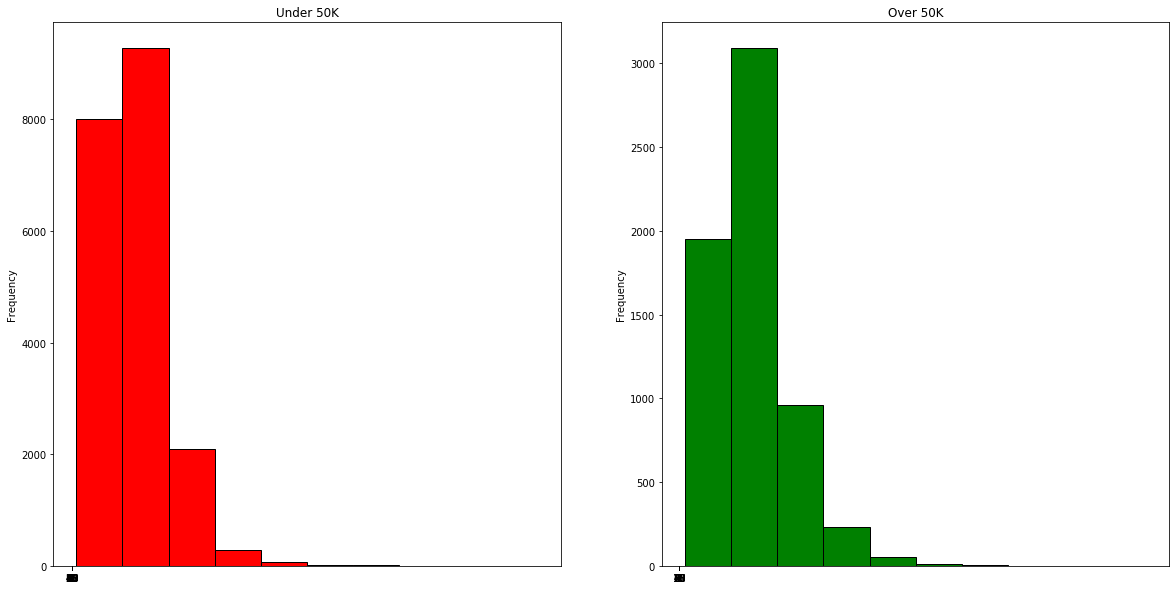

In [144]:
f,ax = plt.subplots(1,2,figsize=(20,10))
train[train['income']==0].fnlwgt.plot.hist(ax=ax[0],bins=10,edgecolor='black',color='red')
ax[0].set_title('Under 50K')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train[train['income']==1].fnlwgt.plot.hist(ax=ax[1],color='green', bins=10, edgecolor='black')
ax[1].set_title('Over 50K')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

In [224]:
print(train['fnlwgt'].max())
print(train['fnlwgt'].min())
print(train['fnlwgt'].mean())

1484705
13769
190304.48170755117


# Race

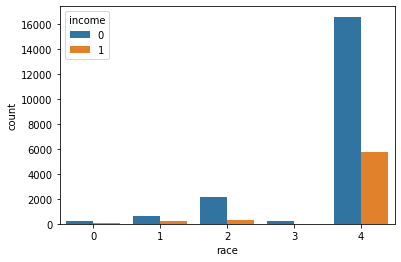

In [225]:
sns.countplot('race',hue='income',data=train)
lst = ['0','1','3']
for i in lst:
    train.loc[train['race']==i,'race']=0
    test.loc[test['race']==i,'race']=0
    
train.loc[train['race']==2,'race']=1
train.loc[train['race']==4,'race']=2

test.loc[test['race']==2,'race']=1
test.loc[test['race']==4,'race']=2

train.loc[train['race']==3,'race']=0
test.loc[test['race']==3,'race']=0

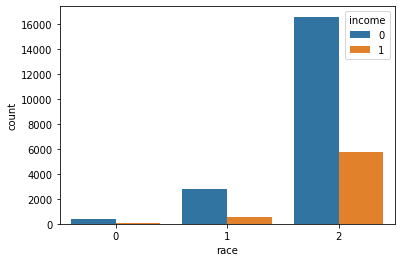

In [153]:
sns.countplot('race',hue='income',data=train)

# hours_per_week

# native_country

In [226]:
train.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income,capital,work_year
0,2,0,168538,0,1,12,0,2,1,60,38,1,0,0
1,0,0,101626,0,0,7,3,2,1,20,38,0,0,0
2,0,0,353358,0,0,8,3,2,1,16,38,0,0,0
3,0,0,151158,0,0,10,3,2,0,25,38,0,0,0
4,0,0,122234,0,0,1,1,1,0,20,0,0,0,0


In [228]:
train['hours_per_week']

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 70,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 80,
 81,
 82,
 84,
 85,
 86,
 88,
 89,
 90,
 91,
 92,
 94,
 95,
 96,
 97,
 98,
 99}

In [156]:
set(train.columns)

{'age',
 'capital',
 'education',
 'fnlwgt',
 'hours_per_week',
 'income',
 'marital_status',
 'native_country',
 'occupation',
 'race',
 'relationship',
 'sex',
 'work_year',
 'workclass'}

In [157]:
train = train.drop('age',axis=1)
test= test.drop('age',axis=1)

In [229]:
train.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income,capital,work_year
0,2,0,168538,0,1,12,0,2,1,60,38,1,0,0
1,0,0,101626,0,0,7,3,2,1,20,38,0,0,0
2,0,0,353358,0,0,8,3,2,1,16,38,0,0,0
3,0,0,151158,0,0,10,3,2,0,25,38,0,0,0
4,0,0,122234,0,0,1,1,1,0,20,0,0,0,0


In [232]:
y = train.pop('income')

In [233]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_jobs=-1,tree_method='gpu_hist')
xgb.fit(train,y)
pred = xgb.predict(test)

In [47]:
sample.head()

,id,prediction
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [230]:
train.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income,capital,work_year
0,2,0,168538,0,1,12,0,2,1,60,38,1,0,0
1,0,0,101626,0,0,7,3,2,1,20,38,0,0,0
2,0,0,353358,0,0,8,3,2,1,16,38,0,0,0
3,0,0,151158,0,0,10,3,2,0,25,38,0,0,0
4,0,0,122234,0,0,1,1,1,0,20,0,0,0,0


In [163]:
train = train.drop('fnlwgt',axis=1)
test= test.drop('fnlwgt',axis=1)

In [234]:
(pd.DataFrame({'id':range(len(pred)),'prediction':pred})).to_csv('11.20.csv',index=False)

[0.02515366 0.0109671  0.01160318 0.11890508 0.61506414 0.02560675
 0.0178342  0.01408659 0.01828896 0.02204394 0.0158657  0.08518345
 0.01939727]


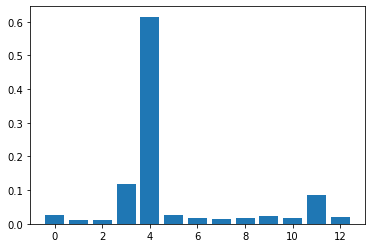

In [235]:
# feature importance
print(xgb.feature_importances_)
# plot
plt.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
plt.show()

In [247]:
print(train.columns[3],train.columns[4],train.columns[11])

education marital_status capital


In [258]:
a = list(set(train.columns).difference(set(['education','mrital_status','capital'])))
list(set(train.columns).difference(set(['education','mrital_status','capital'])))

['marital_status',
 'fnlwgt',
 'relationship',
 'workclass',
 'race',
 'hours_per_week',
 'native_country',
 'work_year',
 'sex',
 'age',
 'occupation']

In [259]:
train = train.drop(a,axis=1)
test = test.drop(a,axis=1)

In [ ]:
dtrain = xgb.DMatrix(Xtrain, label=ytrain, feature_names=feature_names)

In [260]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_jobs=-1,tree_method='gpu_hist')
xgb.fit(train,y)
pred = xgb.predict(test)

In [261]:
(pd.DataFrame({'id':range(len(pred)),'prediction':pred})).to_csv('only_3.csv',index=False)